In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pycwt as wavelet
from pycwt.helpers import find
from matplotlib.image import NonUniformImage

In [3]:
# Traza de Infrasonido
with open('20170328_22_time-infra.txt') as time:
    infra_time_str = time.read().splitlines()

infra_time_d64 = np.array(infra_time_str, dtype='datetime64')
infra_time_utc = infra_time_d64.astype('O')

with open('20170328_22_signal-infra.txt') as signal_str:
    infra_full = list(map(float, signal_str))
s_freq = 100

imin = 31450
imax = imin + 10*60*100
Ldelta = imax-imin
iminev = 49382
imaxev = 55382
Sdelta = imaxev - iminev
iminM, imaxM = (iminev-imin)//2+imin , (imaxev-imax)//2+imax
Mdelta = imaxM-iminM

infra_cropL = infra_full[imin:imax+1]
infra_cropM = infra_full[iminM:imaxM+1]
infra_cropS = infra_full[iminev:imaxev+1]

In [4]:
# Traza de Sismógrafo
with open('201729030100-W5745-6C35E4-sismo.txt') as sismo_file:
    sismo_str = sismo_file.read().splitlines()
    sismo_full = list(map(float, sismo_str[1:]))

sismo_start_str = sismo_str[0].split()[3]
sismo_end_str = sismo_str[0].split()[5]

sismo_N = int(sismo_str[0].split()[-2])
sismo_sr = float(sismo_str[0].split()[7])

sismo_start = datetime.strptime(sismo_start_str, '%Y-%m-%dT%H:%M:%S.%fZ')
sismo_end = datetime.strptime(sismo_end_str, '%Y-%m-%dT%H:%M:%S.%fZ')
sismo_delta = (sismo_end - sismo_start) / sismo_N
increments = range(0, sismo_N) * np.array([sismo_delta]*sismo_N)

sismo_time = sismo_start + increments
sismo_d64 = np.array(sismo_time, dtype='datetime64')

sminev = 288000
smaxev = 294000
smin = sminev-3*60*100
smax = smin + 10*60*100
sminM, smaxM = (sminev-smin)//2+smin , (smaxev-smax)//2+smax

sismo_cropL = sismo_full[smin:smax+1]
sismo_cropM = sismo_full[sminM:smaxM+1]
sismo_cropS = sismo_full[sminev:smaxev+1]

In [ ]:
WCT, aWCT, coiCoh, freqCoh, sigCoh = wct(y1, y2, dt, dj=1/12, s0=-1, J=-1, sig=True, significance_level=0.95, wavelet='morlet', normalize=True):
    
    """Wavelet coherence transform (WCT).

    The WCT finds regions in time frequency space where the two time
    series co-vary, but do not necessarily have high power.

    Parameters
    ----------
    y1, y2 : numpy.ndarray, list
        Input signals.
    dt : float
        Sample spacing.
    dj : float, optional
        Spacing between discrete scales. Default value is 1/12.
        Smaller values will result in better scale resolution, but
        slower calculation and plot.
    s0 : float, optional
        Smallest scale of the wavelet. Default value is 2*dt.
    J : float, optional
        Number of scales less one. Scales range from s0 up to
        s0 * 2**(J * dj), which gives a total of (J + 1) scales.
        Default is J = (log2(N*dt/so))/dj.
    significance_level (float, optional) :
        Significance level to use. Default is 0.95.
    normalize (boolean, optional) :
        If set to true, normalizes CWT by the standard deviation of
        the signals.

    Returns
    -------
    WCT : 
    aWCT : angle
    coi, freq, sig

In [ ]:
WCT, aWCT, coiCoh, freqCoh, sigCoh = wavelet.wct(infra_cropMnp, sismo_cropMnp, 0.01, dj=1/12, s0=-1, J=-1,sig=True,
                                         significance_level=0.95, wavelet='morlet', normalize=True)
#xwt, xcoi, xfreqs, xsignif = wavelet.xwt(infra_cropS, sismo_cropS, 0.01, dj=1/12, s0=-1, J=-1, 
#                                         significance_level=0.95,wavelet='morlet', normalize=True)

In [8]:
#data1 = dict(name='Arctic Oscillation', nick='AO', file='jao.dat')
#data2 = dict(name='Baltic Sea ice extent', nick='BMI', file='jbaltic.dat')
mother = 'morlet'

data1 = dict(name='Traza Sismógrafo', nick='Sismo')#, file='jao.dat')
data2 = dict(name='Traza Infrasonido', nick='Infra')#, file='jbaltic.dat')
mother = 'morlet'

t0 = 0
dt = 0.01  # En segundos
NM = len(infra_cropM)
tM = np.arange(0, NM) * dt + t0

# Loads the data to be analysed.
t1, s1 = tM, np.array(sismo_cropM)
t2, s2 = tM, np.array(infra_cropM)
n1 = t1.size
n2 = t2.size
n = NM

# Change the probablity density function (PDF) of the data. The time series
# of Baltic Sea ice extent is highly bi-modal and we therefore transform the
# timeseries into a series of percentiles. The transformed series probably
# reacts 'more linearly' to climate.
s2, _, _ = wavelet.helpers.boxpdf(s2)

# Calculates the standard deviation of each time series for later
# normalization.
std1 = s1.std()
std2 = s2.std()

Text(0.5, 1.0, 'Infra Wavelet Power Spectrum (Morlet)')

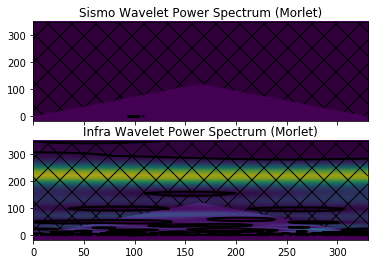

In [9]:
# I. Continuous wavelet transform
# ===============================

# Calculate the CWT of both normalized time series. The function wavelet.cwt
# returns a a list with containing [wave, scales, freqs, coi, fft, fftfreqs]
# variables.
mother = wavelet.Morlet(6)          # Morlet mother wavelet with m=6
slevel = 0.95                       # Significance level
dj = 1/12                           # Twelve sub-octaves per octaves
s0 = -1  # 2 * dt                   # Starting scale, here 6 months
J = -1  # 7 / dj                    # Seven powers of two with dj sub-octaves
if True:
    alpha1, _, _ = wavelet.ar1(s1)  # Lag-1 autocorrelation for red noise
    alpha2, _, _ = wavelet.ar1(s2)  # Lag-1 autocorrelation for red noise
else:
    alpha1 = alpha2 = 0.0           # Lag-1 autocorrelation for white noise

# The following routines perform the wavelet transform and siginificance
# analysis for two data sets.
W1, scales1, freqs1, coi1, _, _ = wavelet.cwt(s1/std1, dt, dj, s0, J, mother)
signif1, fft_theor1 = wavelet.significance(1.0, dt, scales1, 0, alpha1,
                                           significance_level=slevel,
                                           wavelet=mother)
W2, scales2, freqs2, coi2, _, _ = wavelet.cwt(s2/std2, dt, dj, s0, J, mother)
signif2, fft_theor2 = wavelet.significance(1.0, dt, scales2, 0, alpha2,
                                           significance_level=slevel,
                                           wavelet=mother)

power1 = (np.abs(W1)) ** 2             # Normalized wavelet power spectrum
power2 = (np.abs(W2)) ** 2             # Normalized wavelet power spectrum
period1 = 1/freqs1
period2 = 1/freqs2
sig95_1 = np.ones([1, n1]) * signif1[:, None]
sig95_1 = power1 / sig95_1             # Where ratio > 1, power is significant
sig95_2 = np.ones([1, n2]) * signif2[:, None]
sig95_2 = power2 / sig95_2             # Where ratio > 1, power is significant

# First plot is of both CWT
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

extent1 = [t1.min(), t1.max(), 0, max(period1)]
extent2 = [t2.min(), t2.max(), 0, max(period2)]
im1 = NonUniformImage(ax1, interpolation='bilinear', extent=extent1)
im1.set_data(t1, period1, power1)
ax1.images.append(im1)
ax1.contour(t1, period1, sig95_1, [-99, 1], colors='k', linewidths=2,
            extent=extent1)
ax1.fill(np.concatenate([t1, t1[-1:]+dt, t1[-1:]+dt, t1[:1]-dt, t1[:1]-dt]),
         np.concatenate([coi1, [1e-9], period1[-1:], period1[-1:], [1e-9]]),
         'k', alpha=0.3, hatch='x')
ax1.set_title('{} Wavelet Power Spectrum ({})'.format(data1['nick'],
                                                      mother.name))

im2 = NonUniformImage(ax2, interpolation='bilinear', extent=extent2)
im2.set_data(t2, period2, power2)
ax2.images.append(im2)
ax2.contour(t2, period2, sig95_2, [-99, 1], colors='k', linewidths=2,
            extent=extent2)
ax2.fill(np.concatenate([t2, t2[-1:]+dt, t2[-1:]+dt, t2[:1]-dt, t2[:1]-dt]),
         np.concatenate([coi2, [1e-9], period2[-1:], period2[-1:], [1e-9]]),
         'k', alpha=0.3, hatch='x')
ax2.set_xlim(max(t1.min(), t2.min()), min(t1.max(), t2.max()))
ax2.set_title('{} Wavelet Power Spectrum ({})'.format(data2['nick'],
                                                      mother.name))

In [13]:
# II. Cross-wavelet transform
# ===========================

# Due to the difference in the time series, the second signal has to be
# trimmed for the XWT process.
s2 = s2[np.argwhere((t2 >= min(t1)) & (t2 <= max(t1))).flatten()]

# Calculate the cross wavelet transform (XWT). The XWT finds regions in time
# frequency space where the time series show high common power. Torrence and
# Compo (1998) state that the percent point function -- PPF (inverse of the
# cumulative distribution function) -- of a chi-square distribution at 95%
# confidence and two degrees of freedom is Z2(95%)=3.999. However, calculating
# the PPF using chi2.ppf gives Z2(95%)=5.991. To ensure similar significance
# intervals as in Grinsted et al. (2004), one has to use confidence of 86.46%.
W12, cross_coi, freq, signif = wavelet.xwt(s1, s2, dt, dj=1/12, s0=-1, J=-1,
                                           significance_level=0.8646,
                                           wavelet='morlet', normalize=True)

cross_power = np.abs(W12)**2
cross_sig = np.ones([1, n]) * signif[:, None]
cross_sig = cross_power / cross_sig  # Power is significant where ratio > 1
cross_period = 1/freq

In [14]:
# Calculate the wavelet coherence (WTC). The WTC finds regions in time
# frequency space where the two time seris co-vary, but do not necessarily have
# high power.
WCT, aWCT, corr_coi, freq, sig = wavelet.wct(s1, s2, dt, dj=1/12, s0=-1, J=-1,
                                             sig=False,
                                             wavelet='morlet', normalize=True,
                                             cache=True) #significance_level=0.8646

cor_sig = np.ones([1, n]) * sig[:, None]
cor_sig = np.abs(WCT) / cor_sig  # Power is significant where ratio > 1
cor_period = 1 / freq

# Calculates the phase between both time series. The phase arrows in the
# cross wavelet power spectrum rotate clockwise with 'north' origin.
# The relative phase relationship convention is the same as adopted
# by Torrence and Webster (1999), where in phase signals point
# upwards (N), anti-phase signals point downwards (S). If X leads Y,
# arrows point to the right (E) and if X lags Y, arrow points to the
# left (W).
angle = 0.5 * np.pi - aWCT
u, v = np.cos(angle), np.sin(angle)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
fig = plt.figure(figsize=(14,14), dpi=60) 
ax1, ax2 = fig.subplots(nrows=2, ncols=1, sharex=True, sharey=True)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.55, 0.05, 0.35])
cbar_ax_1 = fig.add_axes([0.85, 0.05, 0.05, 0.35])

extent_cross = [t1.min(), t1.max(), 0, max(cross_period)]
extent_corr = [t1.min(), t1.max(), 0, max(cor_period)]
im1 = NonUniformImage(ax1, interpolation='bilinear', extent=extent_cross)
im1.set_data(t1, cross_period, cross_power)
ax1.images.append(im1)
ax1.contour(t1, cross_period, cross_sig, [-99, 1], colors='k', linewidths=2,
            extent=extent_cross)
ax1.fill(np.concatenate([t1, t1[-1:]+dt, t1[-1:]+dt, t1[:1]-dt, t1[:1]-dt]),
         np.concatenate([cross_coi, [1e-9], cross_period[-1:],
                         cross_period[-1:], [1e-9]]),
         'k', alpha=0.3, hatch='x')
ax1.set_title('Cross-Wavelet')
ax1.quiver(t1[::3], cross_period[::3], u[::3, ::3], v[::3, ::3],
           units='width', angles='uv', pivot='mid', linewidth=1,
           edgecolor='k', headwidth=10, headlength=10, headaxislength=5,
           minshaft=2, minlength=5)
fig.colorbar(im1, cax=cbar_ax)

im2 = NonUniformImage(ax2, interpolation='bilinear', extent=extent_corr)
im2.set_data(t1, cor_period, WCT)
ax2.images.append(im2)
ax2.contour(t1, cor_period, cor_sig, [-99, 1], colors='k', linewidths=2,
            extent=extent_corr)
ax2.fill(np.concatenate([t1, t1[-1:]+dt, t1[-1:]+dt, t1[:1]-dt, t1[:1]-dt]),
         np.concatenate([corr_coi, [1e-9], cor_period[-1:], cor_period[-1:],
                         [1e-9]]),
         'k', alpha=0.3, hatch='x')
ax2.set_title('Cross-Correlation')
ax2.quiver(t1[::3], cor_period[::3], u[::3, ::3], v[::3, ::3], units='height',
           angles='uv', pivot='mid', linewidth=1, edgecolor='k',
           headwidth=10, headlength=10, headaxislength=5, minshaft=2,
           minlength=5)
ax2.set_ylim(2, 35)
ax2.set_xlim(max(t1.min(), t2.min()), min(t1.max(), t2.max()))
fig.colorbar(im2, cax=cbar_ax_1)

plt.draw()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: No contour levels were found within the data range.
